Dólar estadounidense (USD)
Población: ~331 millones (Estados Unidos)

Euro (EUR)
Población: ~447 millones (Zona Euro)

Rublo ruso (RUB)
Población: ~144 millones (Rusia)

Yuan chino (CNY)
Población: ~1.4 mil millones (China)

Grivna ucraniana (UAH)
Población: ~41 millones (Ucrania)
 

In [1]:
import requests
import time
import pandas as pd
import http.client
import json
import seaborn as sns
import matplotlib.pyplot as plt
 

### 🌐 Currency Conversion API Request

In [195]:
api_key = "hi"

from_currency = "USD" #SAME
to_currency = "RUB" # / EUR / USD / CNY / UAH /RUB

url = f"https://www.alphavantage.co/query?function=FX_WEEKLY&from_symbol={from_currency}&to_symbol={to_currency}&apikey={api_key}"
 
response = requests.get(url)
#response.status_code
#
#response.json()

In [199]:
data = response.json()
data_series = data["Time Series FX (Weekly)"]

dates = []
opens = []
highs = []
lows = []
closes = []
to_symbol = []
from_symbol = []
from_symbol_value = "USD"   #WE USE USD like stable currency, since we don't have data on gold
to_symbol_value = "RUB"  # / EUR / USD / CNY / RUB
 

for i in data_series.items():
    date = i[0]
    prices = i[1]
    dates.append(date)
    opens.append(float(prices["1. open"]))
    highs.append(float(prices["2. high"]))
    lows.append(float(prices["3. low"]))
    closes.append(float(prices["4. close"]))
    to_symbol.append(to_symbol_value)
    from_symbol.append(from_symbol_value)

df_money_diff= pd.DataFrame({"date":dates,"open":opens,"high":highs,"low":lows,"close":closes,"to symbol":to_symbol,"from symbol":from_symbol})
#
#
# / EUR / USD / CNY / RUB
 

#df_money_diff.to_csv("USD_TO_RUB_.csv", index=False)  #index=True) 

### 📥 Importing CSV: EUR, RUB, CNY, UAH


In [7]:
currency_USD_TO_EUR_YES = pd.read_csv("USD_TO_EUR_.csv")
currency_USD_TO_RUB_YES = pd.read_csv("USD_TO_RUB_.csv") 
currency_USD_TO_CNY_YES = pd.read_csv("USD_TO_CNY_.csv")
currency_USD_TO_UAH_YES = pd.read_csv("USD_TO_UAH_.csv")

In [8]:
#currency_USD_TO_EUR_YES.head(2)
#currency_USD_TO_RUB_YES.head(2)
#currency_USD_TO_CNY_YES.head(2)
currency_USD_TO_UAH_YES.head(2)

,date,open,high,low,close,to symbol,from symbol
0,2024-10-17,41.2072,41.2256,41.1891,41.2256,UAH,USD
1,2024-10-11,41.2202,41.2202,41.1756,41.2072,UAH,USD


##### concat 


In [10]:
concat_EUR_RUB_CNY_UAH = pd.concat([currency_USD_TO_EUR_YES, currency_USD_TO_RUB_YES,currency_USD_TO_CNY_YES,currency_USD_TO_UAH_YES],
                               ignore_index= True) #false?
#concat_EUR_RUB_CNY_UAH.shape

### 📅 Function Dates: February 24, 2022 - February 24, 2023 (One Year Since the War Began)


In [12]:

def filter_dates(data, start_date, end_date):
    data['date'] = data['date']   
    filtered_df = data[(data['date'] >= start_date) & (data['date'] <= end_date)]   
    return filtered_df
    
#currency_USD_TO_EUR_YES
#currency_USD_TO_RUB_YES 
#currency_USD_TO_CNY_YES 
#currency_USD_TO_UAH_YES

#filter Year 2022-02-24 // 2023-02-24
start_date_22_23 = "2022-02-24"  
end_date_22_23 = "2023-02-24"


#filter Year 2017-02-24 // 2022-02-24
start_date_17_22 = "2017-02-24"  
end_date_17_22 = "2022-02-24"


#filter Year 2023-02-24 // 2024-02-24
start_date_23_24 = "2023-02-24"  
end_date_23_24 = "2024-02-24"


#filter Year 2017-02-24 // 2024-02-24
start_date_17_24 = "2017-02-24"  
end_date_17_24 = "2024-02-24"



In [13]:
#filter 2022- 2023 / 02/24

df_EUR_F22_F23 = filter_dates(currency_USD_TO_EUR_YES, start_date_22_23, end_date_22_23)  #EUR
df_RUB_F22_F23 = filter_dates(currency_USD_TO_RUB_YES, start_date_22_23, end_date_22_23)  #RUB
df_CNY_F22_F23 = filter_dates(currency_USD_TO_CNY_YES, start_date_22_23, end_date_22_23)  #CNY
df_UAH_F22_F23 = filter_dates(currency_USD_TO_UAH_YES, start_date_22_23, end_date_22_23)  #UAH


#filter 2017- 2022 / 02/24

df_EUR_F17_F22 = filter_dates(currency_USD_TO_EUR_YES, start_date_17_22, end_date_17_22)  #EUR
df_RUB_F17_F22 = filter_dates(currency_USD_TO_RUB_YES, start_date_17_22, end_date_17_22)  #RUB
df_CNY_F17_F22 = filter_dates(currency_USD_TO_CNY_YES, start_date_17_22, end_date_17_22)  #CNY
df_UAH_F17_F22 = filter_dates(currency_USD_TO_UAH_YES, start_date_17_22, end_date_17_22)  #UAH


#filter 2023- 2024 / 02/24

df_EUR_F23_F24 = filter_dates(currency_USD_TO_EUR_YES, start_date_23_24, end_date_23_24)  #EUR
df_RUB_F23_F24 = filter_dates(currency_USD_TO_RUB_YES, start_date_23_24, end_date_23_24)  #RUB
df_CNY_F23_F24 = filter_dates(currency_USD_TO_CNY_YES, start_date_23_24, end_date_23_24)  #CNY
df_UAH_F23_F24 = filter_dates(currency_USD_TO_UAH_YES, start_date_23_24, end_date_23_24)  #UAH

#filter Year 2017-02-24 // 2024-02-24
 
df_EUR_F17_F24 = filter_dates(currency_USD_TO_EUR_YES, start_date_17_24, end_date_17_24)  #EUR
df_RUB_F17_F24 = filter_dates(currency_USD_TO_RUB_YES, start_date_17_24, end_date_17_24)  #RUB
df_CNY_F17_F24 = filter_dates(currency_USD_TO_CNY_YES, start_date_17_24, end_date_17_24)  #CNY
df_UAH_F17_F24 = filter_dates(currency_USD_TO_UAH_YES, start_date_17_24, end_date_17_24)  #UAH


#TEST
df_RUB_F17_F24.head(2)
#df_UAH_F17_F22["date"].max()
#df_UAH_F17_F22["date"].min()

,date,open,high,low,close,to symbol,from symbol
34,2024-02-23,92.975,95.4934,90.500,94.7260,RUB,USD
35,2024-02-16,90.976,93.4995,89.825,91.9882,RUB,USD


### 🔧 Reset Index 🔄

In [26]:
### reset index 

#filter 2022- 2023 / 02/24
df_EUR_F22_F23 = df_EUR_F22_F23.reset_index(drop=True)
df_RUB_F22_F23 = df_RUB_F22_F23.reset_index(drop=True)
df_CNY_F22_F23 = df_CNY_F22_F23.reset_index(drop=True)
df_UAH_F22_F23 = df_UAH_F22_F23.reset_index(drop=True)


#filter 2017- 2022 / 02/24
df_EUR_F17_F22 =  df_EUR_F17_F22.reset_index(drop=True)
df_RUB_F17_F22 =  df_RUB_F17_F22.reset_index(drop=True)
df_CNY_F17_F22 =  df_CNY_F17_F22.reset_index(drop=True)
df_UAH_F17_F22 =  df_UAH_F17_F22.reset_index(drop=True)

#filter 2023- 2024 / 02/24
df_EUR_F23_F24 = df_EUR_F23_F24.reset_index(drop=True)  #EUR
df_RUB_F23_F24 = df_RUB_F23_F24.reset_index(drop=True)  #RUB
df_CNY_F23_F24 = df_CNY_F23_F24.reset_index(drop=True)  #CNY
df_UAH_F23_F24 = df_UAH_F23_F24.reset_index(drop=True)  #UAH

#filter  2017 - 2024  / 02/24
df_EUR_F17_F24 = df_EUR_F17_F24.reset_index(drop=True)  #EUR
df_RUB_F17_F24 = df_RUB_F17_F24.reset_index(drop=True)  #EUR
df_CNY_F17_F24 = df_CNY_F17_F24.reset_index(drop=True)  #EUR
df_UAH_F17_F24 = df_UAH_F17_F24.reset_index(drop=True)  #EUR



#TEST
df_RUB_F17_F24.head(2)
#df_UAH_F17_F24.min()

,date,open,high,low,close,to symbol,from symbol
0,2024-02-23,92.975,95.4934,90.500,94.7260,RUB,USD
1,2024-02-16,90.976,93.4995,89.825,91.9882,RUB,USD


### 📈 Open-to-Close Average Analysis F22_F23

In [30]:
#Open-Close 2022 - 2023  / 02/24

df_EUR_F22_F23["mean_open_close"] = (df_EUR_F22_F23["open"] + df_EUR_F22_F23["close"]) / 2
df_RUB_F22_F23["mean_open_close"] = (df_RUB_F22_F23["open"] + df_RUB_F22_F23["close"]) / 2 
df_CNY_F22_F23["mean_open_close"] = (df_CNY_F22_F23["open"] + df_CNY_F22_F23["close"]) / 2  
df_UAH_F22_F23["mean_open_close"] = (df_UAH_F22_F23["open"] + df_UAH_F22_F23["close"]) / 2  
##df_UAH_F22_F23.head(2

#Open-Close 2017 - 2022  / 02/24

df_EUR_F17_F22["mean_open_close"] =  (df_EUR_F17_F22["open"] + df_EUR_F17_F22["close"]) / 2
df_RUB_F17_F22["mean_open_close"] =  (df_RUB_F17_F22["open"] + df_RUB_F17_F22["close"]) / 2
df_CNY_F17_F22["mean_open_close"] =  (df_CNY_F17_F22["open"] + df_CNY_F17_F22["close"]) / 2
df_UAH_F17_F22["mean_open_close"] =  (df_UAH_F17_F22["open"] + df_UAH_F17_F22["close"]) / 2


#filter 2023- 2024 / 02/24
df_EUR_F23_F24["mean_open_close"] =  (df_EUR_F23_F24["open"] + df_EUR_F23_F24["close"]) / 2   #EUR
df_RUB_F23_F24["mean_open_close"] =  (df_RUB_F23_F24["open"] + df_RUB_F23_F24["close"]) / 2   #RUB
df_CNY_F23_F24["mean_open_close"] =  (df_CNY_F23_F24["open"] + df_CNY_F23_F24["close"]) / 2   #CNY
df_UAH_F23_F24["mean_open_close"] =  (df_UAH_F23_F24["open"] + df_UAH_F23_F24["close"]) / 2   #UAH


#filter  2017 - 2024  / 02/24
df_EUR_F17_F24["mean_open_close"] =  (df_EUR_F17_F24["open"] + df_EUR_F17_F24["close"]) / 2   #EUR
df_RUB_F17_F24["mean_open_close"] =  (df_RUB_F17_F24["open"] + df_RUB_F17_F24["close"]) / 2   #EUR
df_CNY_F17_F24["mean_open_close"] =  (df_CNY_F17_F24["open"] + df_CNY_F17_F24["close"]) / 2   #EUR
df_UAH_F17_F24["mean_open_close"] =  (df_UAH_F17_F24["open"] + df_UAH_F17_F24["close"]) / 2   #EUR

#test
##df_UAH_F17_F22.head(2)


In [32]:
df_RUB_F17_F24.head(2)

,date,open,high,low,close,to symbol,from symbol,mean_open_close
0,2024-02-23,92.975,95.4934,90.500,94.7260,RUB,USD,93.8505
1,2024-02-16,90.976,93.4995,89.825,91.9882,RUB,USD,91.4821


### 🔗 TIME SERIES

#### COPY

In [36]:
#Open-Close 2022 - 2023  / 02/24

df_copy_EUR_F22_F23 = df_EUR_F22_F23.copy()    #df_EUR_F22_F23     # df_copy_EUR_F22_F23   
df_copy_RUB_F22_F23 = df_RUB_F22_F23.copy()    #df_RUB_F22_F23     # df_copy_RUB_F22_F23   
df_copy_CNY_F22_F23 = df_CNY_F22_F23.copy()    #df_CNY_F22_F23     # df_copy_CNY_F22_F23  
df_copy_UAH_F22_F23 = df_UAH_F22_F23.copy()    #df_UAH_F22_F23     # df_copy_UAH_F22_F23 


#Open-Close 2017 - 2022  / 02/24

df_copy_EUR_F17_F22 = df_EUR_F17_F22.copy()   # df_EUR_F17_F22     # df_copy_EUR_F17_F22  
df_copy_RUB_F17_F22 = df_RUB_F17_F22.copy()   # df_RUB_F17_F22     # df_copy_RUB_F17_F22  
df_copy_CNY_F17_F22 = df_CNY_F17_F22.copy()   # df_CNY_F17_F22     # df_copy_CNY_F17_F22 
df_copy_UAH_F17_F22 = df_UAH_F17_F22.copy()   # df_UAH_F17_F22     # df_copy_UAH_F17_F22  

#filter 2023- 2024 / 02/24

df_copy_EUR_F23_F24 = df_EUR_F23_F24.copy()   # df_EUR_F23_F24     # df_copy_EUR_F23_F24
df_copy_RUB_F23_F24 = df_RUB_F23_F24.copy()   # df_RUB_F23_F24     # df_copy_RUB_F23_F24
df_copy_CNY_F23_F24 = df_CNY_F23_F24.copy()   # df_CNY_F23_F24     # df_copy_CNY_F23_F24
df_copy_UAH_F23_F24 = df_UAH_F23_F24.copy()   # df_UAH_F23_F24     # df_copy_UAH_F23_F24


#filter 2017 - 2024 / 02/24

df_copy_EUR_F17_F24 = df_EUR_F17_F24.copy()   # df_copy_EUR_F17_F24    # df_EUR_F17_F24
df_copy_RUB_F17_F24 = df_RUB_F17_F24.copy()   # df_copy_RUB_F17_F24    # df_RUB_F17_F24
df_copy_CNY_F17_F24 = df_CNY_F17_F24.copy()   # df_copy_CNY_F17_F24    # df_CNY_F17_F24
df_copy_UAH_F17_F24 = df_UAH_F17_F24.copy()   # df_copy_UAH_F17_F24    # df_UAH_F17_F24

#test
#
df_copy_CNY_F17_F24.head(2)

,date,open,high,low,close,to symbol,from symbol,mean_open_close
0,2024-02-18,7.1922,7.1977,7.1166,7.1186,CNY,USD,7.15540
1,2024-02-11,7.1085,7.1930,7.0763,7.1790,CNY,USD,7.14375


In [38]:
df_copy_UAH_F17_F24.head(2)

,date,open,high,low,close,to symbol,from symbol,mean_open_close
0,2024-02-23,37.9484,38.6237,37.9484,38.4803,UAH,USD,38.21435
1,2024-02-16,37.5707,38.1734,37.5707,37.9484,UAH,USD,37.75955


### Time series MA ( Simple Moving Average(SMA): )

In [41]:
                            
#COPY -- Open-Close 2022 - 2023 / 02/24
df_copy_EUR_F22_F23["sma"] = df_copy_EUR_F22_F23["mean_open_close"].rolling(window=4).mean()
df_copy_RUB_F22_F23["sma"] = df_copy_RUB_F22_F23["mean_open_close"].rolling(window=4).mean()
df_copy_CNY_F22_F23["sma"] = df_copy_CNY_F22_F23["mean_open_close"].rolling(window=4).mean()
df_copy_UAH_F22_F23["sma"] = df_copy_UAH_F22_F23["mean_open_close"].rolling(window=4).mean()
 
#COPY -- Open-Close 2017 - 2022 / 02/24
df_copy_EUR_F17_F22["sma"] = df_copy_EUR_F17_F22["mean_open_close"].rolling(window=4).mean()
df_copy_RUB_F17_F22["sma"] = df_copy_RUB_F17_F22["mean_open_close"].rolling(window=4).mean()
df_copy_CNY_F17_F22["sma"] = df_copy_CNY_F17_F22["mean_open_close"].rolling(window=4).mean()
df_copy_UAH_F17_F22["sma"] = df_copy_UAH_F17_F22["mean_open_close"].rolling(window=4).mean()


#COPY --Open-Close 2023- 2024 / 02/24
df_copy_EUR_F23_F24["sma"] = df_copy_EUR_F23_F24["mean_open_close"].rolling(window=4).mean()   # df_EUR_F23_F24     # df_copy_EUR_F23_F24
df_copy_RUB_F23_F24["sma"] = df_copy_RUB_F23_F24["mean_open_close"].rolling(window=4).mean()   # df_RUB_F23_F24     # df_copy_RUB_F23_F24
df_copy_CNY_F23_F24["sma"] = df_copy_CNY_F23_F24["mean_open_close"].rolling(window=4).mean()   # df_CNY_F23_F24     # df_copy_CNY_F23_F24
df_copy_UAH_F23_F24["sma"] = df_copy_UAH_F23_F24["mean_open_close"].rolling(window=4).mean()   # df_UAH_F23_F24     # df_copy_UAH_F23_F24


#COPY --Open-Close 2017 - 2024  / 02/24

#The year consists of 52 weeks. We use a 25-week Simple Moving Average (SMA) 
#when analyzing data from 2017 to better identify trends. This approach helps to smooth out fluctuations in the data (window=25)

df_copy_EUR_F17_F24["sma"] = df_copy_EUR_F17_F24["mean_open_close"].rolling(window=25).mean()   # df_copy_EUR_F17_F24    # df_EUR_F17_F24
df_copy_RUB_F17_F24["sma"] = df_copy_RUB_F17_F24["mean_open_close"].rolling(window=25).mean()   # df_copy_RUB_F17_F24    # df_RUB_F17_F24
df_copy_CNY_F17_F24["sma"] = df_copy_CNY_F17_F24["mean_open_close"].rolling(window=25).mean()   # df_copy_CNY_F17_F24    # df_CNY_F17_F24
df_copy_UAH_F17_F24["sma"] = df_copy_UAH_F17_F24["mean_open_close"].rolling(window=25).mean()   # df_copy_UAH_F17_F24    # df_UAH_F17_F24

#TEST 
#df_copy_EUR_F22_F23.head(4)
#df_EUR_F22_F23.info()

#
#df_copy_UAH_F17_F24.head(4)

### 🔍 Searching for Test Data from 2022-02-24 📅🔢

In [52]:
#We need to find the data closest to the exact date of 2022-02-24 (war started), as the API provides information every 7 days, 
#and not all dates match exactly. This requires a manual search for the data ending on that specific day, 
#as starting dates may vary due to different factors. #

#test Data Search for 2022-02-24
#EUR
df_copy_EUR_F17_F24[df_copy_EUR_F17_F24["date"] == "2022-02-20"]["sma"].values[0]      #0.9396603846153847
#RUB
df_copy_RUB_F17_F24[df_copy_RUB_F17_F24["date"] == "2022-02-25"]["sma"].values[0]     #73.37606538461537
#CNY
df_copy_CNY_F17_F24[df_copy_CNY_F17_F24["date"] == "2022-02-20"]["sma"].values[0]    #6.571090384615384
#UAH
df_copy_UAH_F17_F24[df_copy_UAH_F17_F24["date"] == "2022-02-25"]["sma"].values[0]    #30.705084615384614

#test
df_copy_UAH_F17_F24.head(2)

,date,open,high,low,close,to symbol,from symbol,mean_open_close,sma
0,2024-02-23,37.9484,38.6237,37.9484,38.4803,UAH,USD,38.21435,NaN
1,2024-02-16,37.5707,38.1734,37.5707,37.9484,UAH,USD,37.75955,NaN


### 🔍 Analyzing Price Fluctuations from Feb 24, 2022 📊

In [57]:
#We use the base price from February 20, 2022, as a base to calculate percentage fluctuations since the start of the war. 
#This helps us assess how the price has changed in response to events 

#EUR
base_price_EUR_F17_F24 = df_copy_EUR_F17_F24[df_copy_EUR_F17_F24["date"] == "2022-02-20"]["sma"].values[0]
#RUB
base_price_RUB_F17_F24 = df_copy_RUB_F17_F24[df_copy_RUB_F17_F24["date"] == "2022-02-25"]["sma"].values[0]
#CNY
base_price_CNY_F17_F24 = df_copy_CNY_F17_F24[df_copy_CNY_F17_F24["date"] == "2022-02-20"]["sma"].values[0]
#UAH
base_price_UAH_F17_F24 = df_copy_UAH_F17_F24[df_copy_UAH_F17_F24["date"] == "2022-02-25"]["sma"].values[0]

#test
df_copy_RUB_F17_F24.head(2)

,date,open,high,low,close,to symbol,from symbol,mean_open_close,sma
0,2024-02-23,92.975,95.4934,90.500,94.7260,RUB,USD,93.8505,NaN
1,2024-02-16,90.976,93.4995,89.825,91.9882,RUB,USD,91.4821,NaN


### 🔍 Analyzing % Variations in Currency Prices 📉

In [60]:
#We calculate the percentage fluctuation of the currency price from the base date to assess the impact of events. 
#We use percentages for a clearer visual comparison of price changes and to better understand market variations.

#EUR
df_copy_EUR_F17_F24["percentage %"] = 100 - (df_copy_EUR_F17_F24["mean_open_close"] *100/ base_price_EUR_F17_F24)
#RUB
df_copy_RUB_F17_F24["percentage %"] = 100 - (df_copy_RUB_F17_F24["mean_open_close"] *100/ base_price_RUB_F17_F24)
#CNY
df_copy_CNY_F17_F24["percentage %"] = 100 - (df_copy_CNY_F17_F24["mean_open_close"] *100/ base_price_CNY_F17_F24)
#UAH
df_copy_UAH_F17_F24["percentage %"] = 100 - (df_copy_UAH_F17_F24["mean_open_close"] *100/ base_price_UAH_F17_F24)

#test
#df_copy_UAH_F17_F24.head(2)

### 📊 1-Year % Data Since the War Began 🌍

In [63]:
#abs() substitute negative numbers by positives, here we dont need negatives for median // fluctuacion median
#It doesn't matter if the fluctuations are positive or negative, what we're looking for is the variance in curremcy changes

#We only use the data during the course of one year since the war began. 2022-02-24 // 2023-02-24

#EUR
percentage_median_22_23_eur = df_copy_EUR_F17_F24[(df_copy_EUR_F17_F24["date"] < "2023-02-24") &(df_copy_EUR_F17_F24["date"] > "2022-02-24")]["percentage %"].abs().median()
#RUB
percentage_median_22_23_rub = df_copy_RUB_F17_F24[(df_copy_RUB_F17_F24["date"] < "2023-02-24") &(df_copy_RUB_F17_F24["date"] > "2022-02-24")]["percentage %"].abs().median()
#CNY
percentage_median_22_23_cny = df_copy_CNY_F17_F24[(df_copy_CNY_F17_F24["date"] < "2023-02-24") &(df_copy_CNY_F17_F24["date"] > "2022-02-24")]["percentage %"].abs().median()
#UAH
percentage_median_22_23_uah = df_copy_UAH_F17_F24[(df_copy_UAH_F17_F24["date"] < "2023-02-24") &(df_copy_UAH_F17_F24["date"] > "2022-02-24")]["percentage %"].abs().median()

#TEST
#percentage_median_22_23_eur

### 📈 % Data Dictionary for Graph 📊

In [66]:
#We save our data in a dictionary for later use in creating a graph

dic_percentage_median_22_23 = {}
dic_percentage_median_22_23["EUR"]=round(percentage_median_22_23_eur,2)
dic_percentage_median_22_23["RUB"]=round(percentage_median_22_23_rub,2)
dic_percentage_median_22_23["CNY"]=round(percentage_median_22_23_cny,2)
dic_percentage_median_22_23["UAH"]=round(percentage_median_22_23_uah,2)


#test
dic_percentage_median_22_23

{'EUR': 2.76, 'RUB': 17.49, 'CNY': 3.42, 'UAH': 20.0}

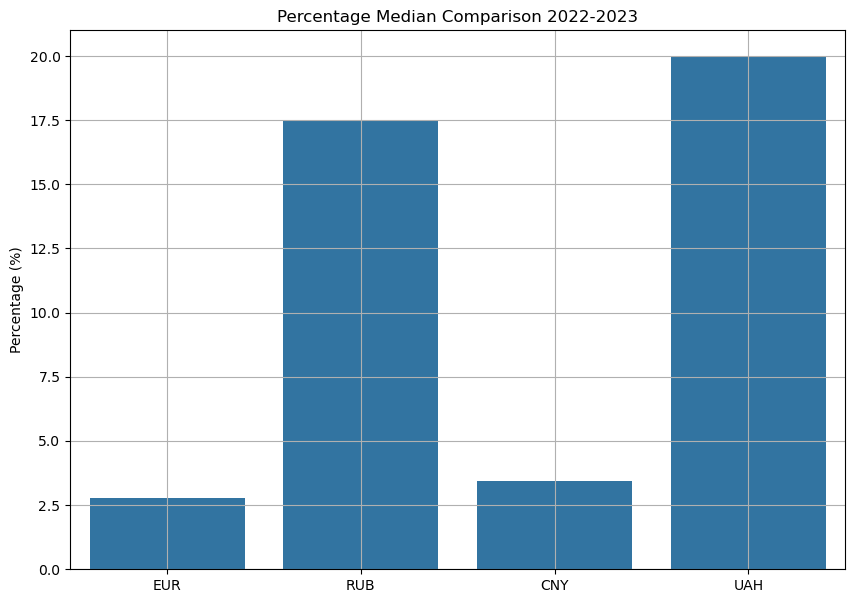

In [68]:
#

plt.figure(figsize=(10, 7)) 
sns.barplot(x=list(dic_percentage_median_22_23.keys()), y=list(dic_percentage_median_22_23.values()))
plt.ylabel('Percentage (%)')
plt.title('Percentage Median Comparison 2022-2023')   
plt.grid()
plt.show()



### 🔄 Converting Data to DateTime Format 📆✨

In [73]:
 
def to_datetime(data):
    for df in data:
        if "date" in df.columns:   
            df["date"] = pd.to_datetime(df["date"])
        else:
            print(f"error.")

data_df = [
    #Open-Close 2022 - 2023
    df_EUR_F22_F23,df_RUB_F22_F23,df_CNY_F22_F23,df_UAH_F22_F23,
    #Open-Close 2017 - 2022
    df_EUR_F17_F22,df_RUB_F17_F22,df_CNY_F17_F22,df_UAH_F17_F22,
    #Open-Close 2023- 2024 
    df_EUR_F23_F24,df_RUB_F23_F24,df_CNY_F23_F24,df_UAH_F23_F24,
    #Open-Close 2017- 2024 
    df_EUR_F17_F24,df_RUB_F17_F24,df_CNY_F17_F24,df_UAH_F17_F24,
    #COPY -- Open-Close 2022 - 2023
    df_copy_EUR_F22_F23,df_copy_RUB_F22_F23,df_copy_CNY_F22_F23,df_copy_UAH_F22_F23,
    #COPY -- Open-Close 2017 - 2022
    df_copy_EUR_F17_F22,df_copy_RUB_F17_F22,df_copy_CNY_F17_F22,df_copy_UAH_F17_F22,
    #COPY --Open-Close 2023- 2024 / 02/24
    df_copy_EUR_F23_F24,df_copy_RUB_F23_F24,df_copy_CNY_F23_F24,df_copy_UAH_F23_F24,
    #COPY --Open-Close 2017- 2024 
    df_copy_EUR_F17_F24,df_copy_RUB_F17_F24,df_copy_CNY_F17_F24,df_copy_UAH_F17_F24,
    
]

to_datetime(data_df)

#test
#

### 📊 Seaborn Visualizations: 2027 - 2024   

🧪 Running Test

In [77]:
#2022 - 2023                                #2022 - 2023
#df_EUR_F22_F23     # df_copy_EUR_F22_F23     
#df_RUB_F22_F23     # df_copy_RUB_F22_F23     
#df_CNY_F22_F23     # df_copy_CNY_F22_F23     
#df_UAH_F22_F23     # df_copy_UAH_F22_F23     
#2017 - 2022                               #2017 - 2022
##df_EUR_F17_F22    # df_copy_EUR_F17_F22     
##df_RUB_F17_F22    # df_copy_RUB_F17_F22    
##df_CNY_F17_F22    # df_copy_CNY_F17_F22     
##df_UAH_F17_F22    # df_copy_UAH_F17_F22    
#2023- 2024                                #2023- 2024 
# df_EUR_F23_F24     # df_copy_EUR_F23_F24
# df_RUB_F23_F24     # df_copy_RUB_F23_F24
# df_CNY_F23_F24     # df_copy_CNY_F23_F24
# df_UAH_F23_F24     # df_copy_UAH_F23_F24
#2017 - 2024                               #2017 - 2024   
# df_EUR_F17_F24  # df_copy_EUR_F17_F24   
# df_RUB_F17_F24  # df_copy_RUB_F17_F24     
# df_CNY_F17_F24  # df_copy_CNY_F17_F24    
# df_UAH_F17_F24  # df_copy_UAH_F17_F24    

#
#test
#df_RUB_F23_F24.info()

#### 💹  Seaborn UAH 💱 2017 - 2024  // 2022 - 2023

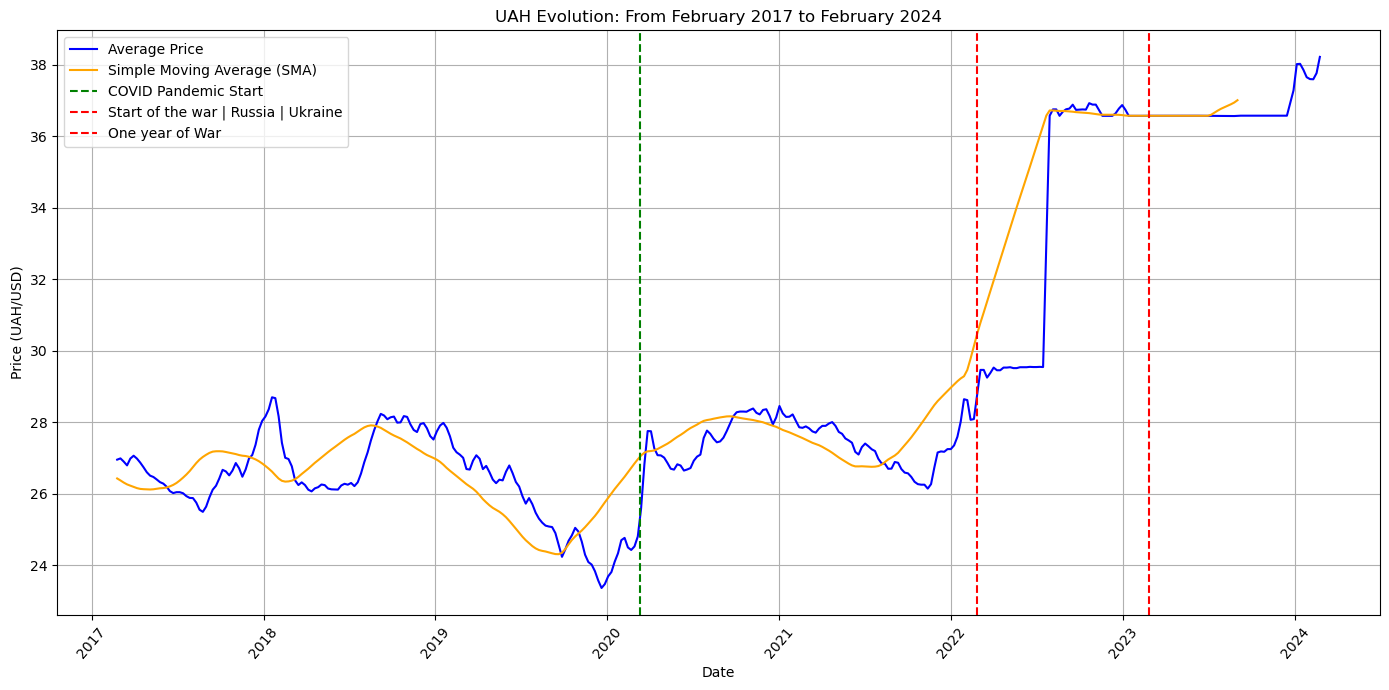

In [80]:
plt.figure(figsize=(14, 7))

plt.plot(df_UAH_F17_F24["date"], df_UAH_F17_F24["mean_open_close"], label="Average Price", color="blue")

plt.plot(df_copy_UAH_F17_F24["date"], df_copy_UAH_F17_F24["sma"], label="Simple Moving Average (SMA)", color="orange")

plt.axvline(pd.to_datetime("2020-03-11"), color="green", linestyle="--", label="COVID Pandemic Start")
plt.axvline(pd.to_datetime("2022-02-24"), color="red", linestyle="--", label="Start of the war | Russia | Ukraine")
plt.axvline(pd.to_datetime("2023-02-24"), color="red", linestyle="--", label="One year of War")

plt.legend()
plt.title("UAH Evolution: From February 2017 to February 2024")
plt.xticks(rotation=50)   
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price (UAH/USD)")
plt.tight_layout()   
plt.show()


#### 💹  Seaborn UAH 💱  2022 - 2023

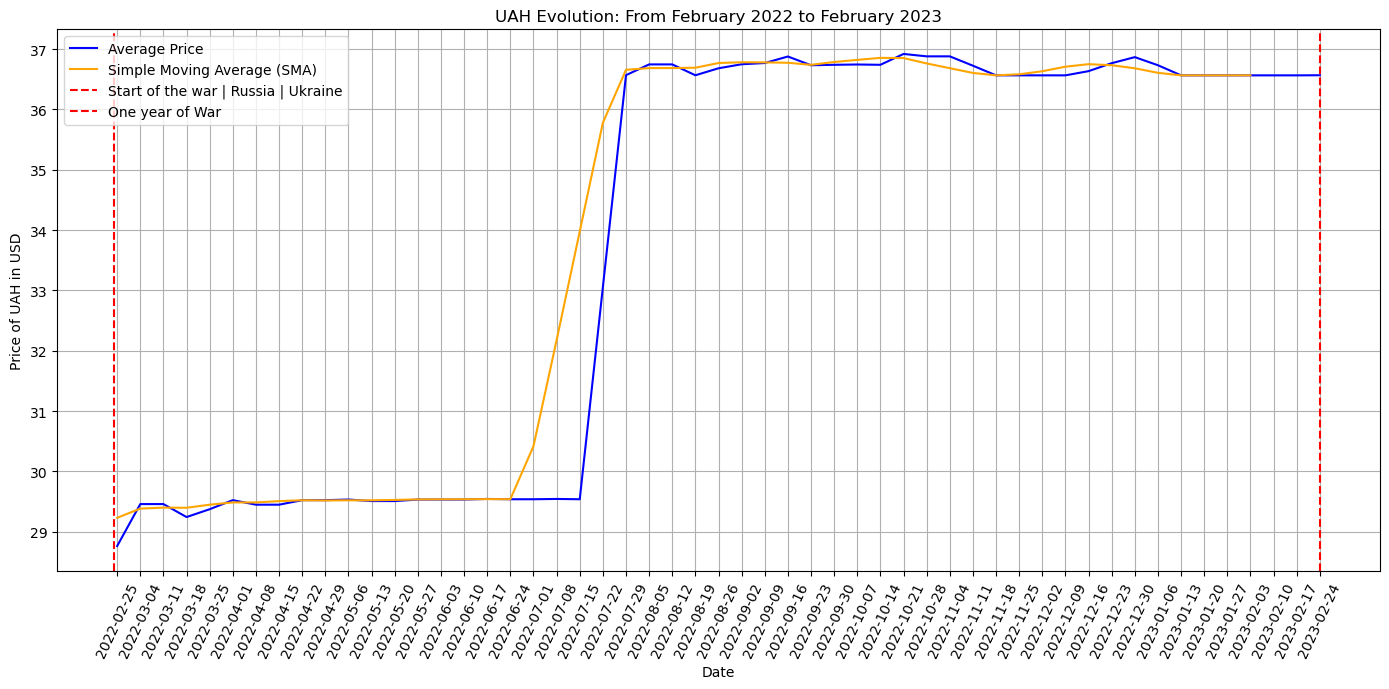

In [83]:
plt.figure(figsize=(14, 7))

plt.plot(df_UAH_F22_F23["date"], df_UAH_F22_F23["mean_open_close"], label="Average Price", color="blue")

plt.plot(df_copy_UAH_F22_F23["date"], df_copy_UAH_F22_F23["sma"], label="Simple Moving Average (SMA)", color="orange")

plt.axvline(pd.to_datetime("2022-02-24"), color="red", linestyle="--", label="Start of the war | Russia | Ukraine")
plt.axvline(pd.to_datetime("2023-02-24"), color="red", linestyle="--", label="One year of War")

plt.legend()
plt.title("UAH Evolution: From February 2022 to February 2023")
plt.xticks(df_UAH_F22_F23["date"], rotation=65)
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price of UAH in USD")
plt.tight_layout()   
plt.show()


#### 💹  Seaborn CNY 💱 2017 - 2024  // 2022 - 2023

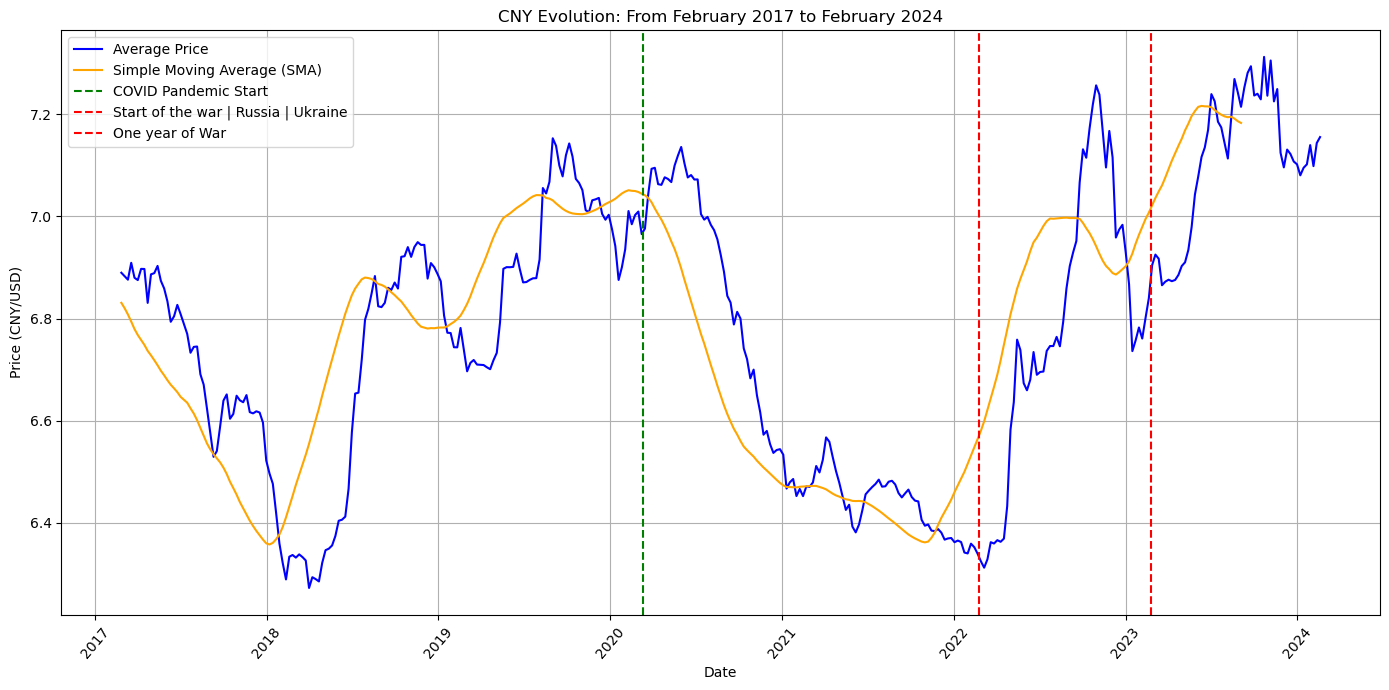

In [92]:
plt.figure(figsize=(14, 7))

plt.plot(df_CNY_F17_F24["date"], df_CNY_F17_F24["mean_open_close"], label="Average Price", color="blue")

plt.plot(df_copy_CNY_F17_F24["date"], df_copy_CNY_F17_F24["sma"], label="Simple Moving Average (SMA)", color="orange")

plt.axvline(pd.to_datetime("2020-03-11"), color="green", linestyle="--", label="COVID Pandemic Start")
plt.axvline(pd.to_datetime("2022-02-24"), color="red", linestyle="--", label="Start of the war | Russia | Ukraine")
plt.axvline(pd.to_datetime("2023-02-24"), color="red", linestyle="--", label="One year of War")

plt.legend()
plt.title("CNY Evolution: From February 2017 to February 2024")
plt.xticks(rotation=50)   
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price (CNY/USD)")
plt.tight_layout()   
plt.show()


#### 💹  Seaborn CNY 💱  2022 - 2023

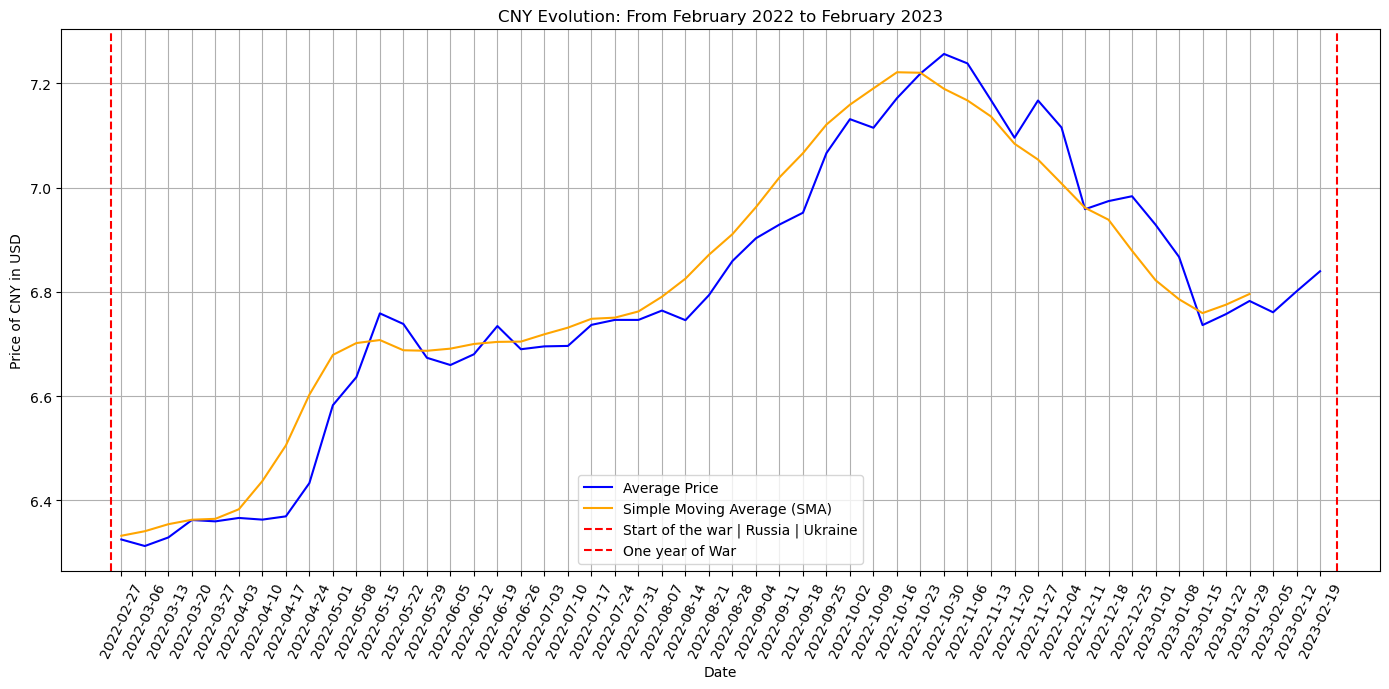

In [94]:
plt.figure(figsize=(14, 7))

plt.plot(df_CNY_F22_F23["date"], df_CNY_F22_F23["mean_open_close"], label="Average Price", color="blue")

plt.plot(df_copy_CNY_F22_F23["date"], df_copy_CNY_F22_F23["sma"], label="Simple Moving Average (SMA)", color="orange")

plt.axvline(pd.to_datetime("2022-02-24"), color="red", linestyle="--", label="Start of the war | Russia | Ukraine")
plt.axvline(pd.to_datetime("2023-02-24"), color="red", linestyle="--", label="One year of War")

plt.legend()
plt.title("CNY Evolution: From February 2022 to February 2023")
plt.xticks(df_CNY_F22_F23["date"], rotation=65)
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price of CNY in USD")
plt.tight_layout()   
plt.show()


#### 💹  Seaborn RUB 💱 2017 - 2024  // 2022 - 2023

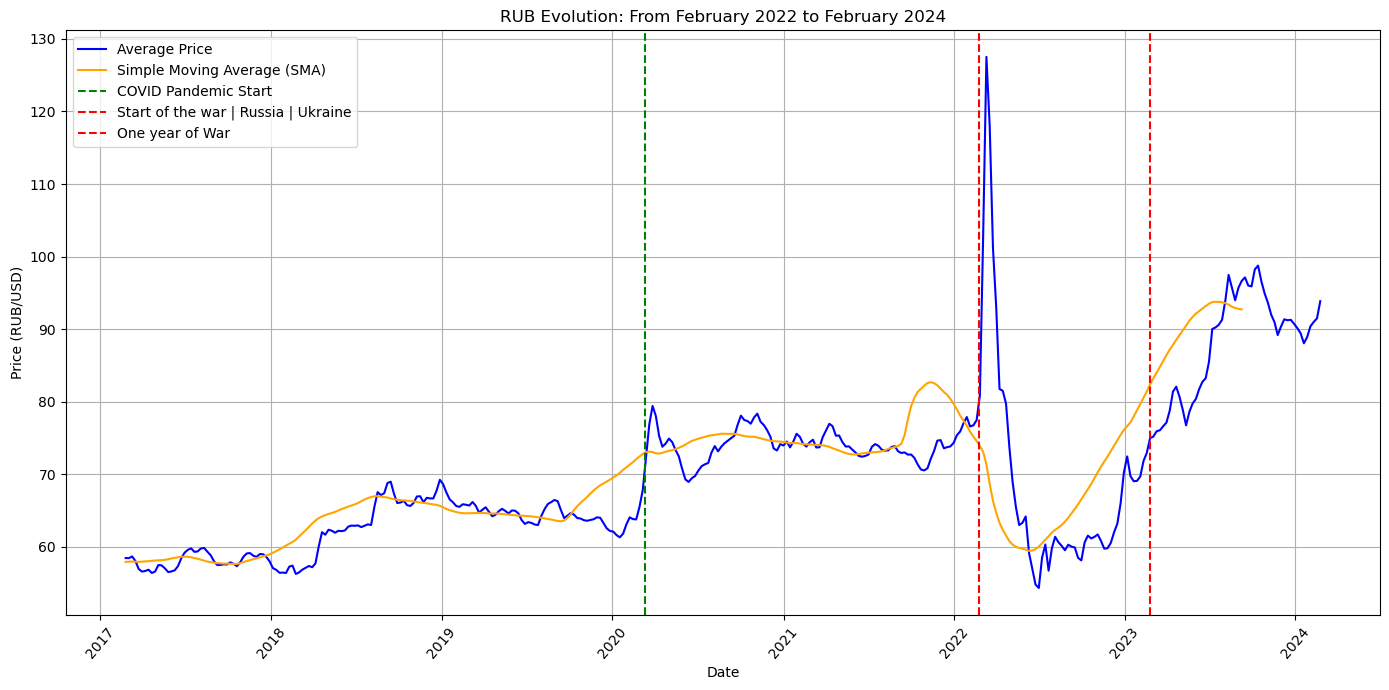

In [100]:
plt.figure(figsize=(14, 7))

plt.plot(df_RUB_F17_F24["date"], df_RUB_F17_F24["mean_open_close"], label="Average Price", color="blue")

plt.plot(df_copy_RUB_F17_F24["date"], df_copy_RUB_F17_F24["sma"], label="Simple Moving Average (SMA)", color="orange")

plt.axvline(pd.to_datetime("2020-03-11"), color="green", linestyle="--", label="COVID Pandemic Start")
plt.axvline(pd.to_datetime("2022-02-24"), color="red", linestyle="--", label="Start of the war | Russia | Ukraine")
plt.axvline(pd.to_datetime("2023-02-24"), color="red", linestyle="--", label="One year of War")

plt.legend()
plt.title("RUB Evolution: From February 2022 to February 2024")
plt.xticks(rotation=50)   
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price (RUB/USD)")
plt.tight_layout()   
plt.show()


#### 💹  Seaborn RUB 💱  2022 - 2023

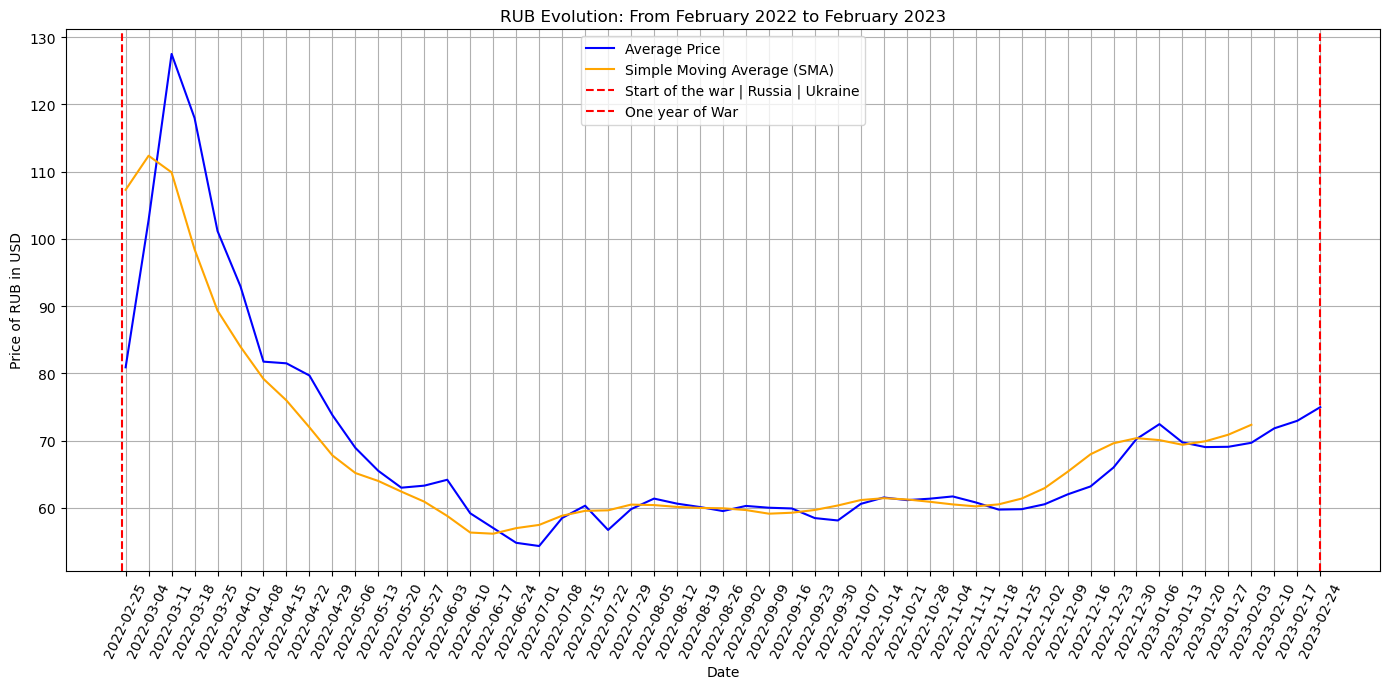

In [103]:
plt.figure(figsize=(14, 7))

plt.plot(df_RUB_F22_F23["date"], df_RUB_F22_F23["mean_open_close"], label="Average Price", color="blue")

plt.plot(df_copy_RUB_F22_F23["date"], df_copy_RUB_F22_F23["sma"], label="Simple Moving Average (SMA)", color="orange")

plt.axvline(pd.to_datetime("2022-02-24"), color="red", linestyle="--", label="Start of the war | Russia | Ukraine")
plt.axvline(pd.to_datetime("2023-02-24"), color="red", linestyle="--", label="One year of War")

plt.legend()
plt.title("RUB Evolution: From February 2022 to February 2023")
plt.xticks(df_RUB_F22_F23["date"], rotation=65)
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price of RUB in USD")
plt.tight_layout()   
plt.show()


#### 💹  Seaborn EUR 💱 2017 - 2024  // 2022 - 2023

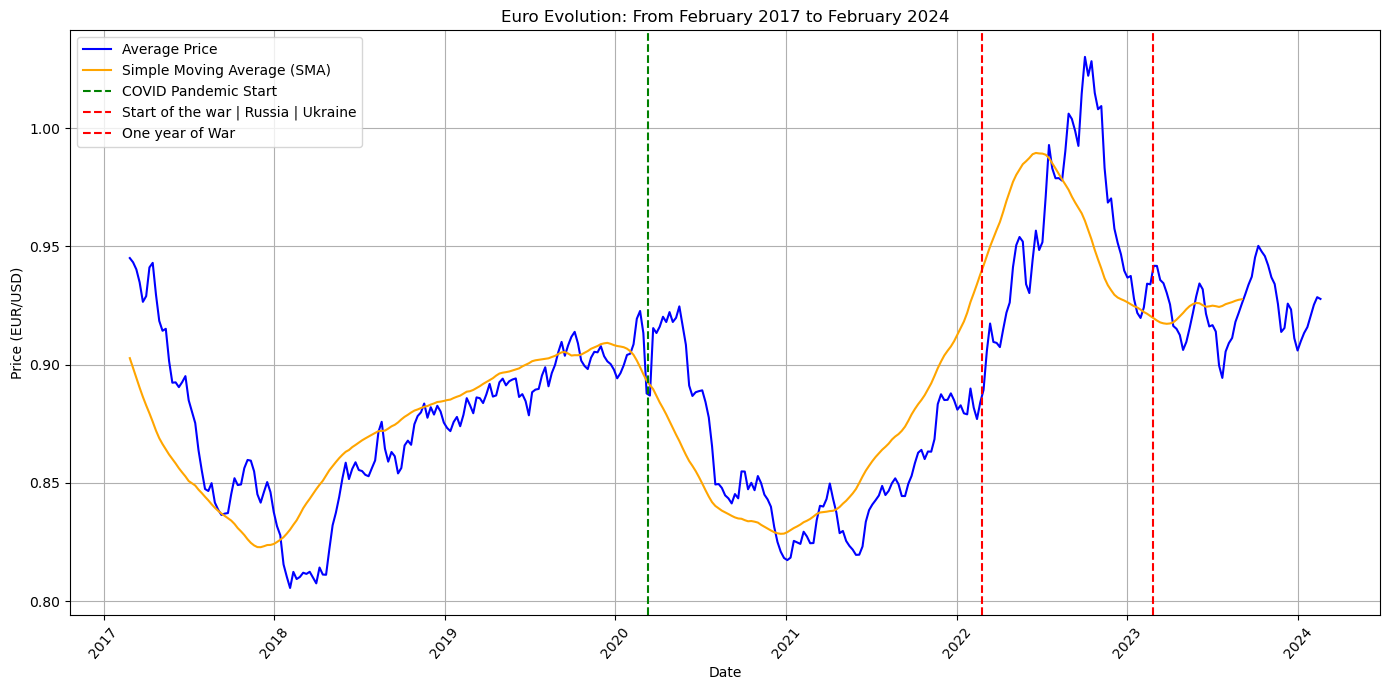

In [108]:
plt.figure(figsize=(14, 7))

plt.plot(df_EUR_F17_F24["date"], df_EUR_F17_F24["mean_open_close"], label="Average Price", color="blue")

plt.plot(df_copy_EUR_F17_F24["date"], df_copy_EUR_F17_F24["sma"], label="Simple Moving Average (SMA)", color="orange")

plt.axvline(pd.to_datetime("2020-03-11"), color="green", linestyle="--", label="COVID Pandemic Start")
plt.axvline(pd.to_datetime("2022-02-24"), color="red", linestyle="--", label="Start of the war | Russia | Ukraine")
plt.axvline(pd.to_datetime("2023-02-24"), color="red", linestyle="--", label="One year of War")

plt.legend()
plt.title("Euro Evolution: From February 2017 to February 2024")
#plt.xticks(df_EUR_F22_F23["date"], rotation=85)
plt.xticks(rotation=50)   
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price (EUR/USD)")
plt.tight_layout()   
plt.show()


#### 💹  Seaborn EUR 💱  2022 - 2023

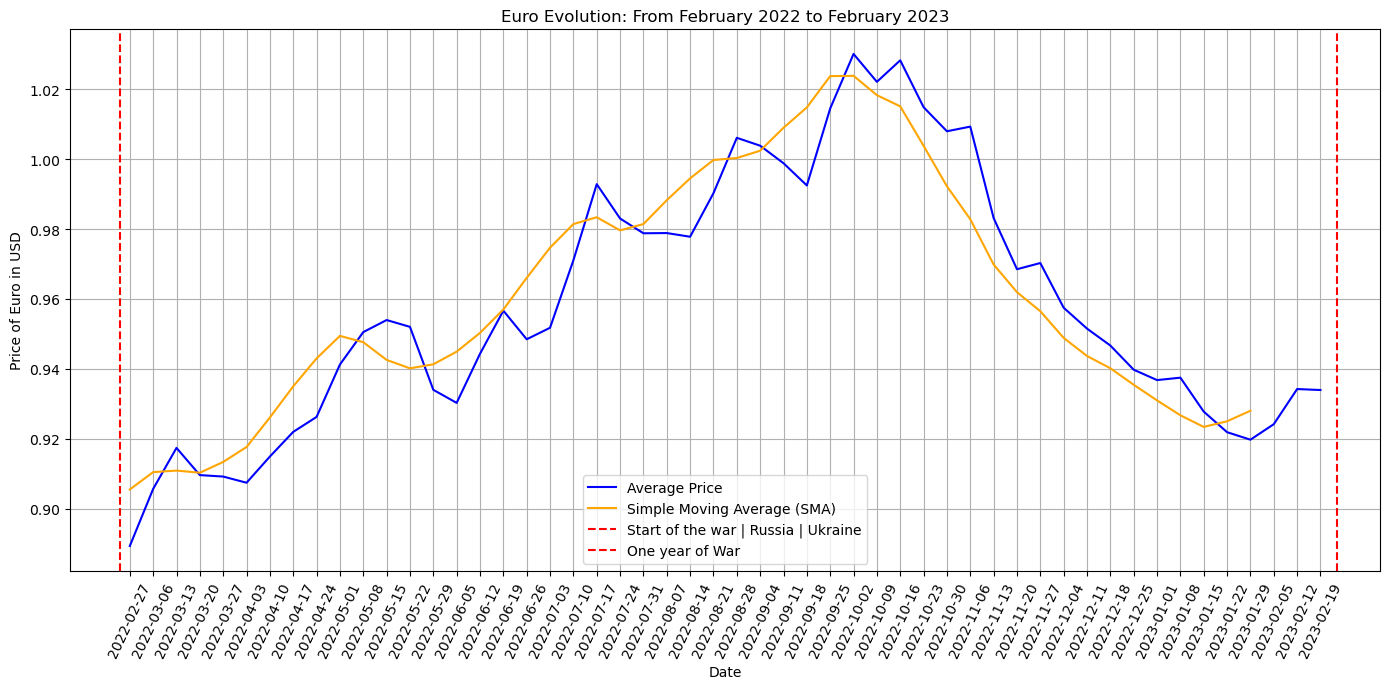

In [111]:
plt.figure(figsize=(14, 7))

plt.plot(df_EUR_F22_F23["date"], df_EUR_F22_F23["mean_open_close"], label="Average Price", color="blue")

plt.plot(df_copy_EUR_F22_F23["date"], df_copy_EUR_F22_F23["sma"], label="Simple Moving Average (SMA)", color="orange")

plt.axvline(pd.to_datetime("2022-02-24"), color="red", linestyle="--", label="Start of the war | Russia | Ukraine")
plt.axvline(pd.to_datetime("2023-02-24"), color="red", linestyle="--", label="One year of War")

plt.legend()
plt.title("Euro Evolution: From February 2022 to February 2023")
plt.xticks(df_EUR_F22_F23["date"], rotation=65)
#plt.xticks(rotation=50)   
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price of Euro in USD")
plt.tight_layout()   
plt.show()


In [ ]:
#2022 - 2023                                #2022 - 2023
#df_EUR_F22_F23     # df_copy_EUR_F22_F23     
#df_RUB_F22_F23     # df_copy_RUB_F22_F23     
#df_CNY_F22_F23     # df_copy_CNY_F22_F23     
#df_UAH_F22_F23     # df_copy_UAH_F22_F23     
#2017 - 2022                               #2017 - 2022
##df_EUR_F17_F22    # df_copy_EUR_F17_F22     
##df_RUB_F17_F22    # df_copy_RUB_F17_F22    
##df_CNY_F17_F22    # df_copy_CNY_F17_F22     
##df_UAH_F17_F22    # df_copy_UAH_F17_F22    
#2023- 2024                                #2023- 2024 
# df_EUR_F23_F24     # df_copy_EUR_F23_F24
# df_RUB_F23_F24     # df_copy_RUB_F23_F24
# df_CNY_F23_F24     # df_copy_CNY_F23_F24
# df_UAH_F23_F24     # df_copy_UAH_F23_F24
#2017 - 2024                               #2017 - 2024   
# df_EUR_F17_F24  # df_copy_EUR_F17_F24   
# df_RUB_F17_F24  # df_copy_RUB_F17_F24     
# df_CNY_F17_F24  # df_copy_CNY_F17_F24    
# df_UAH_F17_F24  # df_copy_UAH_F17_F24    

#
#test
#df_RUB_F23_F24.info()

### 🔗 Merge OC Average with F22_F23

In [123]:
"""
#EUR
merge_EUR_F22_F23 = df_EUR_F22_F23.merge(df_EUR_OC_average, left_index=True, right_index=True)

#RUB
merge_RUB_F22_F23 = df_RUB_F22_F23.merge(df_RUB_OC_average, left_index=True, right_index=True)

#CNY
merge_CNY_F22_F23 = df_CNY_F22_F23.merge(df_CNY_OC_average, left_index=True, right_index=True)

#UAH
merge_UAH_F22_F23 = df_UAH_F22_F23.merge(df_UAH_OC_average, left_index=True, right_index=True)

#merge_UAH_F22_F23.head(2) """

'\n#EUR\nmerge_EUR_F22_F23 = df_EUR_F22_F23.merge(df_EUR_OC_average, left_index=True, right_index=True)\n\n#RUB\nmerge_RUB_F22_F23 = df_RUB_F22_F23.merge(df_RUB_OC_average, left_index=True, right_index=True)\n\n#CNY\nmerge_CNY_F22_F23 = df_CNY_F22_F23.merge(df_CNY_OC_average, left_index=True, right_index=True)\n\n#UAH\nmerge_UAH_F22_F23 = df_UAH_F22_F23.merge(df_UAH_OC_average, left_index=True, right_index=True)\n\n#merge_UAH_F22_F23.head(2) '

### 📊 Seaborn Visualizations: 2023 - 2024   

#### 💹  Seaborn EUR 💱 2023 - 2024


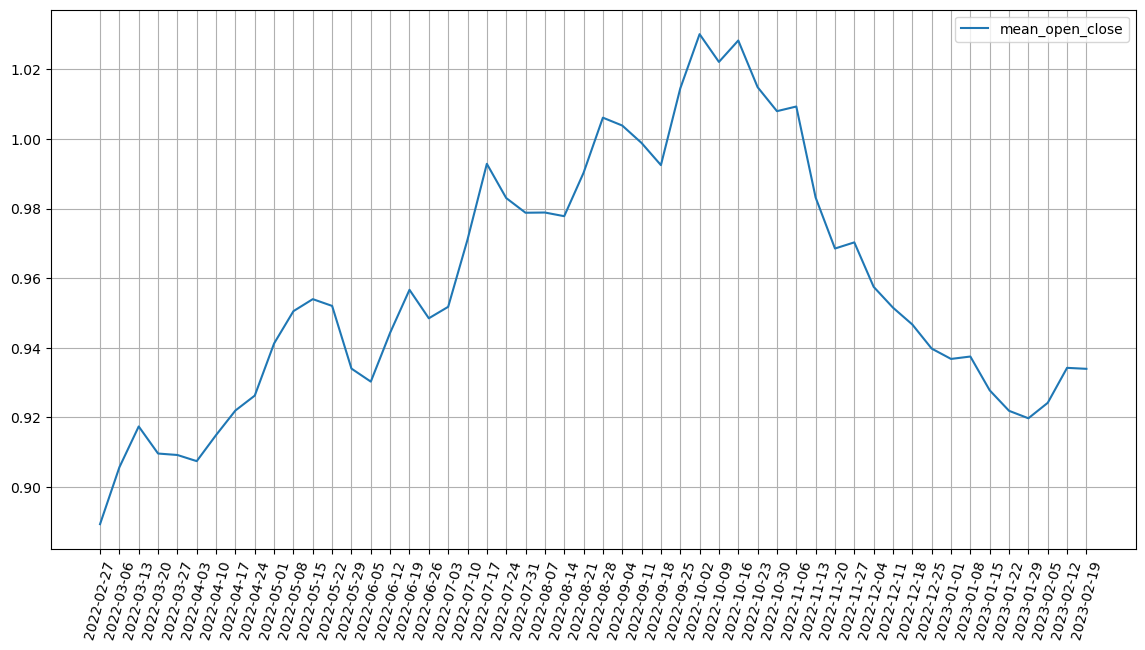

In [127]:
#EUR  df_EUR_F22_F23
#
#RUB df_RUB_F22_F23 
#CNY df_CNY_F22_F23
#UAH df_UAH_F22_F23  
#
df_EUR_F22_F23['date'] = pd.to_datetime(df_EUR_F22_F23['date'])
#df_EUR_F22_F23.info()   # 0   date             52 non-null     datetime64[ns]

plt.figure(figsize=(14, 7))
plt.plot(df_EUR_F22_F23["date"], df_EUR_F22_F23["mean_open_close"], label="mean_open_close")
plt.legend()
plt.xticks(df_EUR_F22_F23["date"], rotation=75)
plt.grid() 
plt.show()

 

#### 💹  Seaborn RUB 💱 2023 - 2024


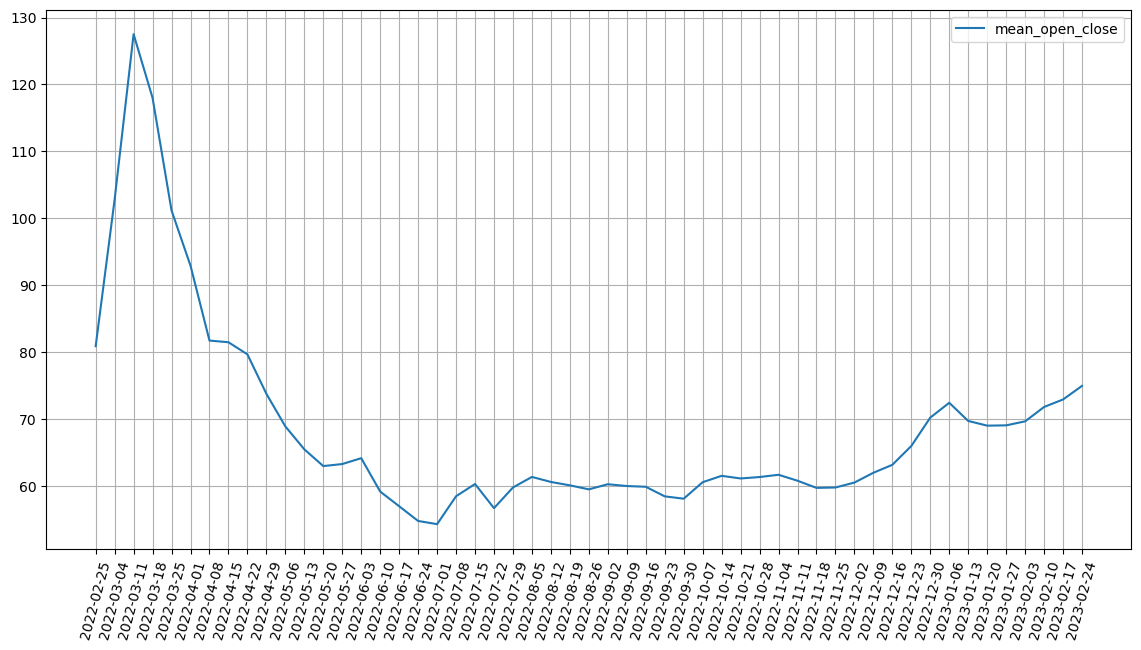

In [133]:
#RUB   df_RUB_F22_F23 
 
df_RUB_F22_F23['date'] = pd.to_datetime(df_RUB_F22_F23['date'])
plt.figure(figsize=(14, 7))
plt.plot(df_RUB_F22_F23["date"], df_RUB_F22_F23["mean_open_close"], label="mean_open_close")
plt.legend()
plt.xticks(df_RUB_F22_F23["date"], rotation=75)
plt.grid() 
plt.show()

 

#### 💹  Seaborn CNY 💱 2023 - 2024


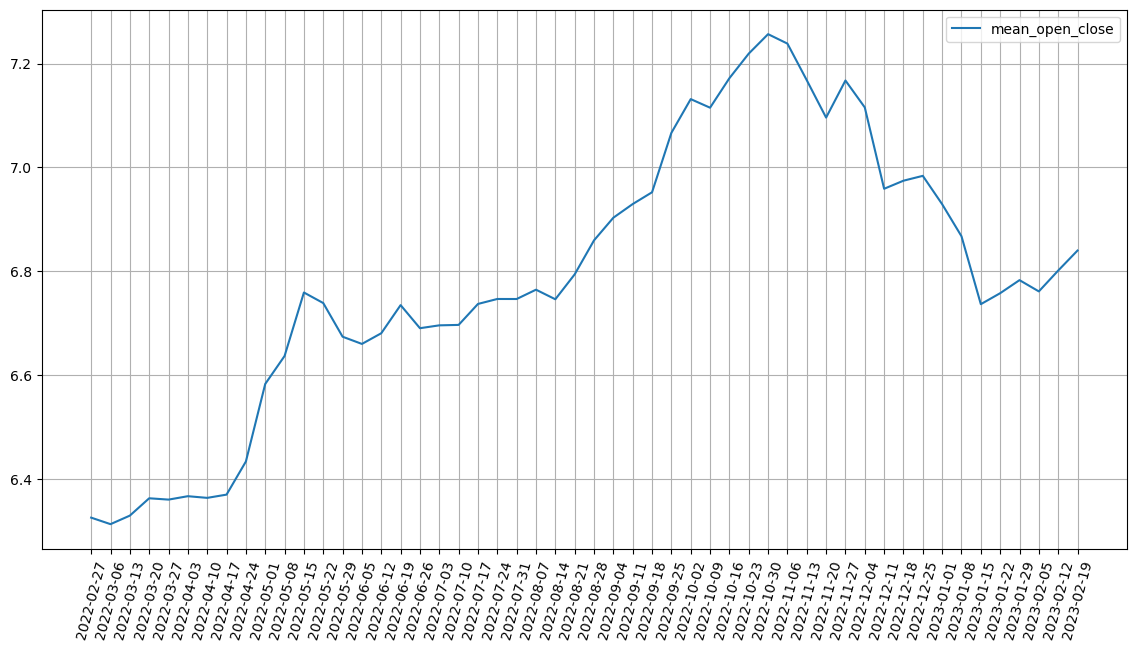

In [135]:
#CNY   df_CNY_F22_F23
 
df_CNY_F22_F23['date'] = pd.to_datetime(df_CNY_F22_F23['date'])
plt.figure(figsize=(14, 7))
plt.plot(df_CNY_F22_F23["date"], df_CNY_F22_F23["mean_open_close"], label="mean_open_close")
plt.legend()
plt.xticks(df_CNY_F22_F23["date"], rotation=75)
plt.grid() 
plt.show()

 

#### 💹  Seaborn UAH 💱 2023 - 2024


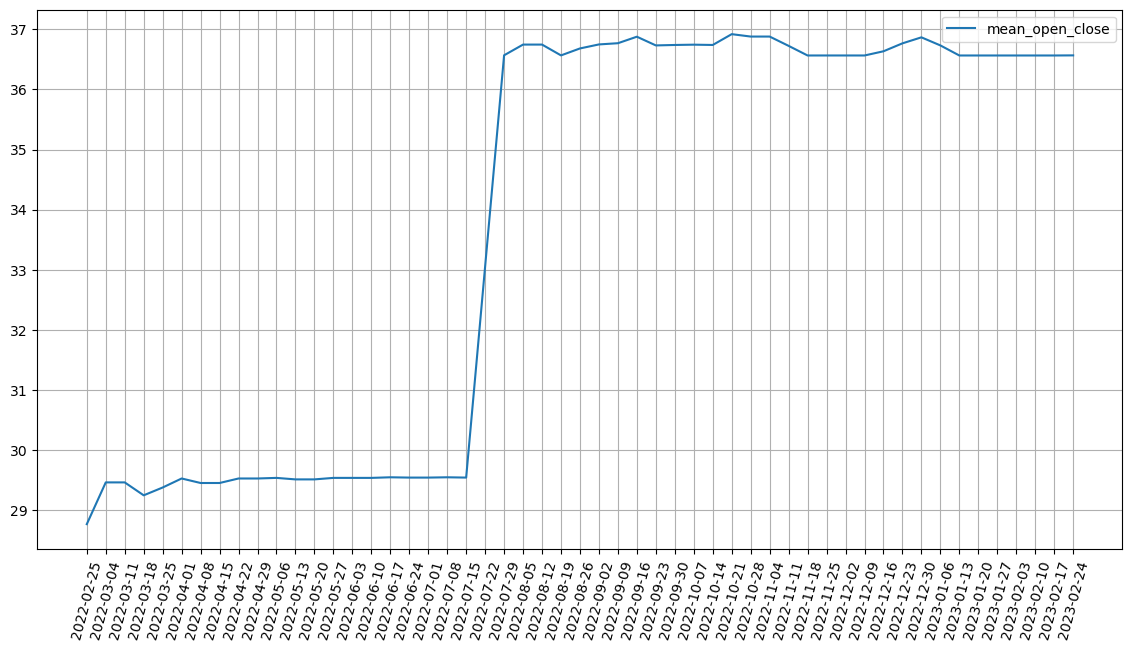

In [137]:
#UAH   df_UAH_F22_F23  
 
df_UAH_F22_F23['date'] = pd.to_datetime(df_UAH_F22_F23['date'])
plt.figure(figsize=(14, 7))
plt.plot(df_UAH_F22_F23["date"], df_UAH_F22_F23["mean_open_close"], label="mean_open_close")
plt.legend()
plt.xticks(df_UAH_F22_F23["date"], rotation=75)
plt.grid() 
plt.show()

 

### 📊 Seaborn Visualizations: 2017 - 2022

#### 💹  Seaborn EUR 💱 2017 - 2022


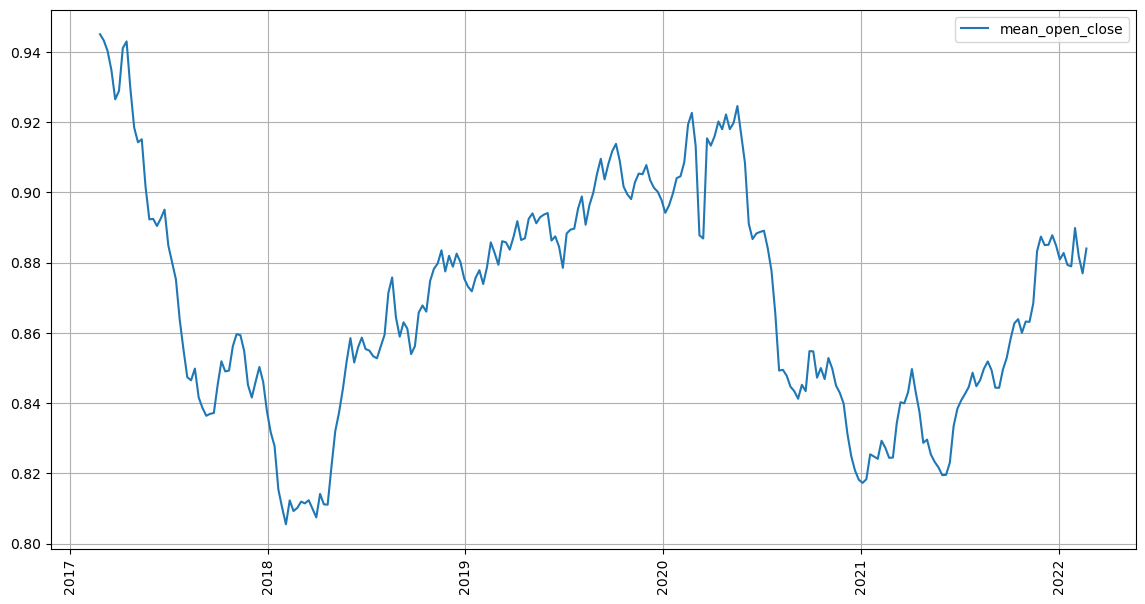

In [144]:
#EUR  df_EUR_F17_F22
#
#RUB df_RUB_F17_F22 
#CNY df_CNY_F17_F22
#UAH df_UAH_F17_F22  
#
df_EUR_F17_F22['date'] = pd.to_datetime(df_EUR_F17_F22['date'])
#merge_EUR_F22_F23.info()   # 0   date             52 non-null     datetime64[ns]

plt.figure(figsize=(14, 7))
plt.plot(df_EUR_F17_F22["date"], df_EUR_F17_F22["mean_open_close"], label="mean_open_close")
plt.legend()
#plt.xticks(df_EUR_F17_F22["date"], rotation=75)
plt.xticks(rotation=90)
plt.grid() 
plt.show()

#### 💹  Seaborn RUB 💱 2017 - 2022

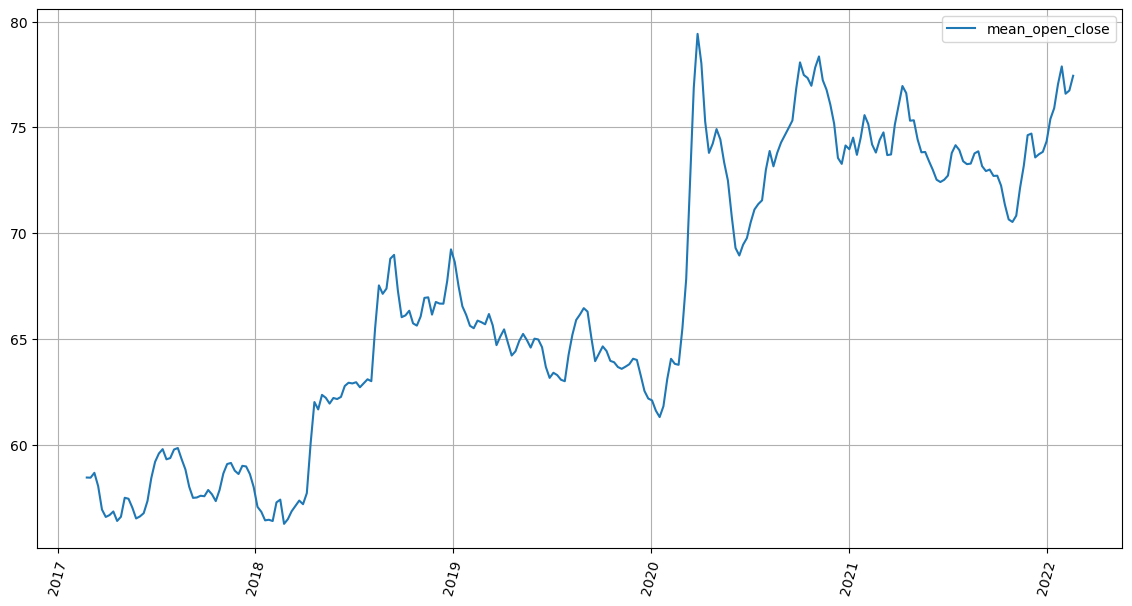

In [193]:
#RUB df_RUB_F17_F22 
 
df_RUB_F17_F22['date'] = pd.to_datetime(df_RUB_F17_F22['date'])
plt.figure(figsize=(14, 7))
plt.plot(df_RUB_F17_F22["date"], df_RUB_F17_F22["mean_open_close"], label="mean_open_close")
plt.legend()
plt.xticks(rotation=75)
plt.grid() 
plt.show()

#### 💹  Seaborn CNY 💱 2017 - 2022

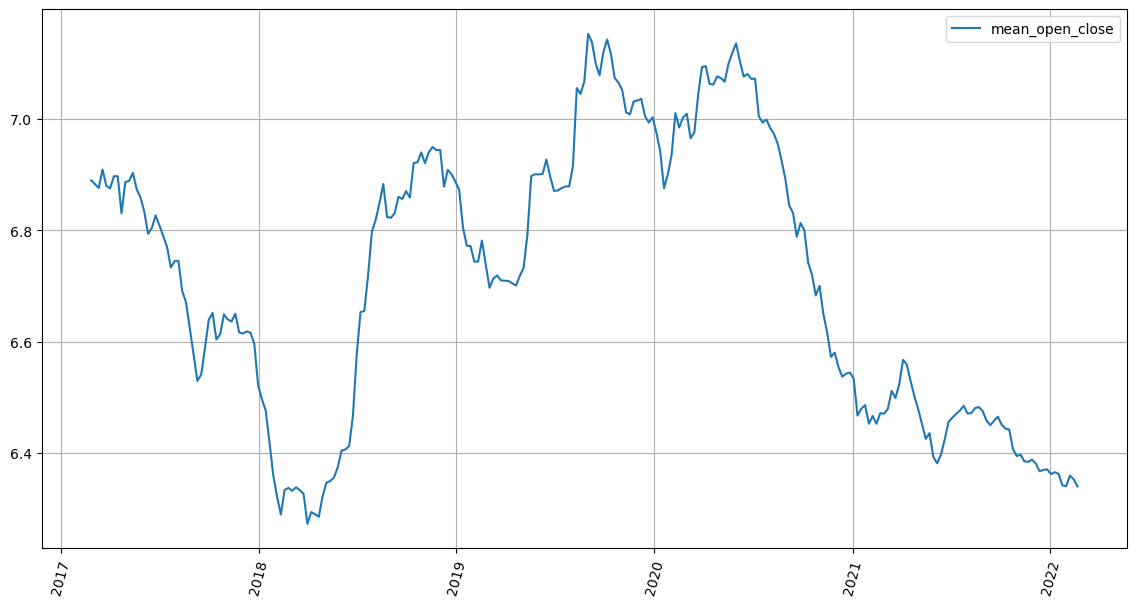

In [191]:
#CNY df_CNY_F17_F22
 
df_CNY_F17_F22['date'] = pd.to_datetime(df_CNY_F17_F22['date'])
plt.figure(figsize=(14, 7))
plt.plot(df_CNY_F17_F22["date"], df_CNY_F17_F22["mean_open_close"], label="mean_open_close")
plt.legend()
plt.xticks(rotation=75)
plt.grid() 
plt.show()

#### 💹  Seaborn UAH 💱 2017 - 2022

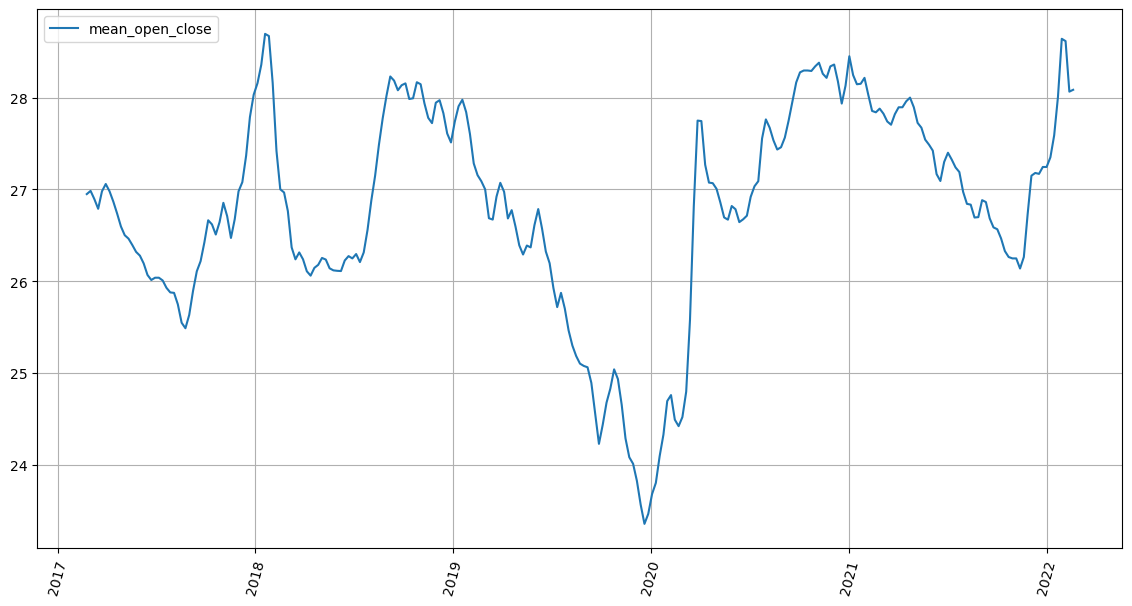

In [189]:
#UAH df_UAH_F17_F22  
#
df_UAH_F17_F22['date'] = pd.to_datetime(df_UAH_F17_F22['date'])
plt.figure(figsize=(14, 7))
plt.plot(df_UAH_F17_F22["date"], df_UAH_F17_F22["mean_open_close"], label="mean_open_close")
plt.legend()
plt.xticks(rotation=75)
plt.grid() 
plt.show()

#### 📊 Seaborn 💱 2017 - 2022  #EUR #RUB #CNY #UAH

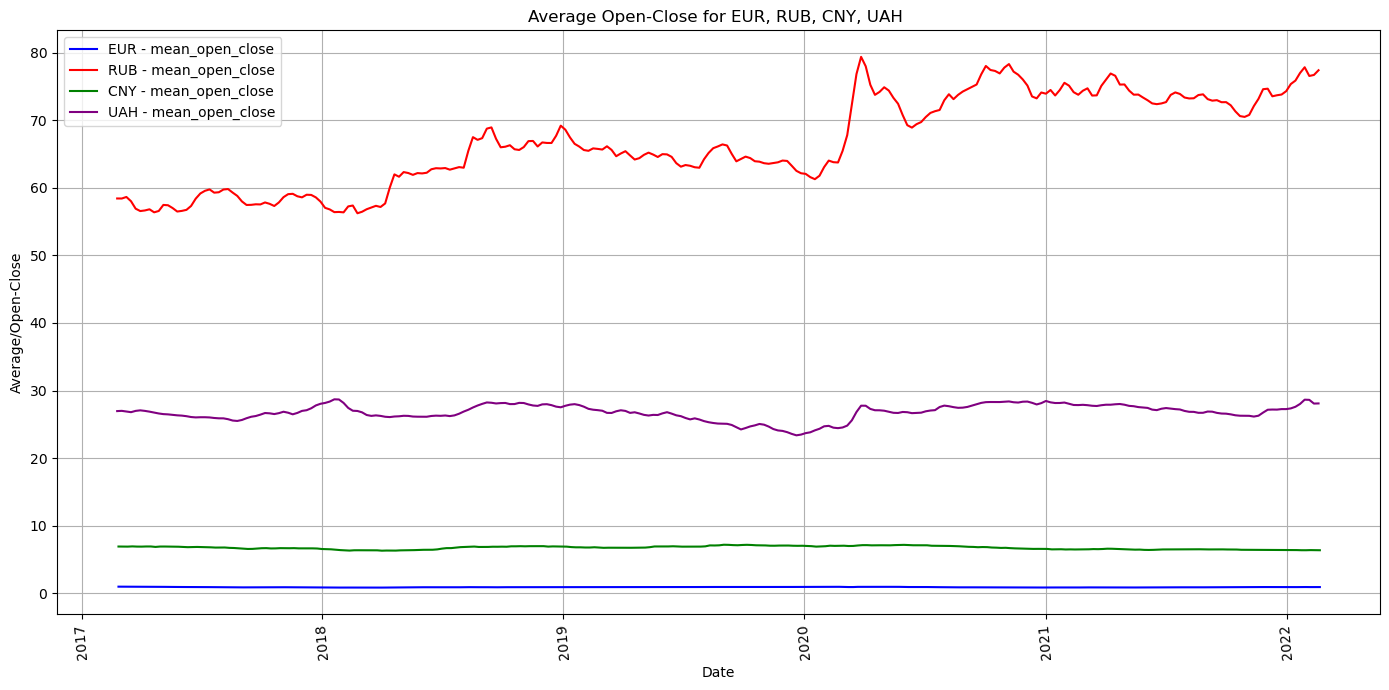

In [166]:
#EUR  df_EUR_F17_F22
#RUB  df_RUB_F17_F22 
#CNY  df_CNY_F17_F22
#UAH  df_UAH_F17_F22  
#

plt.figure(figsize=(14, 7))

#EUR
plt.plot(df_EUR_F17_F22["date"], df_EUR_F17_F22["mean_open_close"], label="EUR - mean_open_close", color="blue")
#RUB
plt.plot(df_RUB_F17_F22["date"], df_RUB_F17_F22["mean_open_close"], label="RUB - mean_open_close", color="red")
#CNY
plt.plot(df_CNY_F17_F22["date"], df_CNY_F17_F22["mean_open_close"], label="CNY - mean_open_close", color="green")
#UAH
plt.plot(df_UAH_F17_F22["date"], df_UAH_F17_F22["mean_open_close"], label="UAH - mean_open_close", color="purple")


plt.legend()
plt.title("Average Open-Close for EUR, RUB, CNY, UAH ")   
plt.xticks(rotation=95)   
plt.grid()  # Fondo
plt.xlabel("Date")   
plt.ylabel("Average/Open-Close")   
plt.tight_layout()   
plt.show()

# error

In [172]:
                            
#COPY -- Open-Close 2022 - 2023
df_copy_EUR_F22_F23["7_day_ma"] = df_copy_EUR_F22_F23["mean_open_close"].rolling(window=4).mean()
df_copy_RUB_F22_F23["7_day_ma"] = df_copy_RUB_F22_F23["mean_open_close"].rolling(window=4).mean()
df_copy_CNY_F22_F23["7_day_ma"] = df_copy_CNY_F22_F23["mean_open_close"].rolling(window=4).mean()
df_copy_UAH_F22_F23["7_day_ma"] = df_copy_UAH_F22_F23["mean_open_close"].rolling(window=4).mean()
 
#COPY -- Open-Close 2017 - 2022
df_copy_EUR_F17_F22["7_day_ma"] = df_copy_EUR_F17_F22["mean_open_close"].rolling(window=4).mean()
df_copy_RUB_F17_F22["7_day_ma"] = df_copy_RUB_F17_F22["mean_open_close"].rolling(window=4).mean()
df_copy_CNY_F17_F22["7_day_ma"] = df_copy_CNY_F17_F22["mean_open_close"].rolling(window=4).mean()
df_copy_UAH_F17_F22["7_day_ma"] = df_copy_UAH_F17_F22["mean_open_close"].rolling(window=4).mean()


#COPY --Open-Close 2023- 2024 / 02/24
df_copy_EUR_F23_F24["7_day_ma"] = df_copy_EUR_F23_F24["mean_open_close"].rolling(window=4).mean()   # df_EUR_F23_F24     # df_copy_EUR_F23_F24
df_copy_RUB_F23_F24["7_day_ma"] = df_copy_RUB_F23_F24["mean_open_close"].rolling(window=4).mean()   # df_RUB_F23_F24     # df_copy_RUB_F23_F24
df_copy_CNY_F23_F24["7_day_ma"] = df_copy_CNY_F23_F24["mean_open_close"].rolling(window=4).mean()   # df_CNY_F23_F24     # df_copy_CNY_F23_F24
df_copy_UAH_F23_F24["7_day_ma"] = df_copy_UAH_F23_F24["mean_open_close"].rolling(window=4).mean()   # df_UAH_F23_F24     # df_copy_UAH_F23_F24

#TEST 
df_copy_CNY_F23_F24.head(4)
#df_EUR_F22_F23.info()

#

,date,open,high,low,close,to symbol,from symbol,mean_open_close,sma,7_day_ma
0,2024-02-18,7.1922,7.1977,7.1166,7.1186,CNY,USD,7.15540,NaN,NaN
1,2024-02-11,7.1085,7.1930,7.0763,7.1790,CNY,USD,7.14375,NaN,NaN
2,2024-02-04,7.0845,7.1971,7.0669,7.1126,CNY,USD,7.09855,NaN,NaN
3,2024-01-28,7.1927,7.1928,7.0542,7.0866,CNY,USD,7.13965,7.134337,7.134337


#### to_datetime # error

In [175]:
#Open-Close 2022 - 2023
 
df_EUR_F22_F23["date"] = pd.to_datetime(df_EUR_F22_F23["date"])
df_RUB_F22_F23["date"] = pd.to_datetime(df_RUB_F22_F23["date"])
df_CNY_F22_F23["date"] = pd.to_datetime(df_CNY_F22_F23["date"])
df_UAH_F22_F23["date"] = pd.to_datetime(df_UAH_F22_F23["date"])

#Open-Close 2017 - 2022
df_EUR_F17_F22["date"] = pd.to_datetime(df_EUR_F17_F22["date"])
df_RUB_F17_F22["date"] = pd.to_datetime(df_RUB_F17_F22["date"])
df_CNY_F17_F22["date"] = pd.to_datetime(df_CNY_F17_F22["date"])
df_UAH_F17_F22["date"] = pd.to_datetime(df_UAH_F17_F22["date"])

#Open-Close 2023- 2024 / 02/24
df_EUR_F23_F24["date"] = pd.to_datetime(df_EUR_F23_F24["date"])   #EUR
df_RUB_F23_F24["date"] = pd.to_datetime(df_RUB_F23_F24["date"])   #RUB
df_CNY_F23_F24["date"] = pd.to_datetime(df_CNY_F23_F24["date"])   #CNY
df_UAH_F23_F24["date"] = pd.to_datetime(df_UAH_F23_F24["date"])   #UAH

#-------

#COPY -- Open-Close 2022 - 2023
df_copy_EUR_F22_F23["date"] = pd.to_datetime(df_copy_EUR_F22_F23["date"])
df_copy_RUB_F22_F23["date"] = pd.to_datetime(df_copy_RUB_F22_F23["date"])
df_copy_CNY_F22_F23["date"] = pd.to_datetime(df_copy_CNY_F22_F23["date"])
df_copy_UAH_F22_F23["date"] = pd.to_datetime(df_copy_UAH_F22_F23["date"])

#COPY -- Open-Close 2017 - 2022
df_copy_EUR_F17_F22["date"] = pd.to_datetime(df_copy_EUR_F17_F22["date"])
df_copy_RUB_F17_F22["date"] = pd.to_datetime(df_copy_RUB_F17_F22["date"])
df_copy_CNY_F17_F22["date"] = pd.to_datetime(df_copy_CNY_F17_F22["date"])
df_copy_UAH_F17_F22["date"] = pd.to_datetime(df_copy_UAH_F17_F22["date"])


#COPY --Open-Close 2023- 2024 / 02/24
df_copy_EUR_F23_F24["date"] = pd.to_datetime(df_copy_EUR_F23_F24["date"])   # df_EUR_F23_F24     # df_copy_EUR_F23_F24
df_copy_RUB_F23_F24["date"] = pd.to_datetime(df_copy_RUB_F23_F24["date"])   # df_RUB_F23_F24     # df_copy_RUB_F23_F24
df_copy_CNY_F23_F24["date"] = pd.to_datetime(df_copy_CNY_F23_F24["date"])   # df_CNY_F23_F24     # df_copy_CNY_F23_F24
df_copy_UAH_F23_F24["date"] = pd.to_datetime(df_copy_UAH_F23_F24["date"])   # df_UAH_F23_F24     # df_copy_UAH_F23_F24


#Test
#df_copy_EUR_F17_F22["date"] = df_copy_EUR_F17_F22["date"].astype(str)
#df_copy_EUR_F17_F22.set_index("date", inplace=True)
#df_copy_UAH_F17_F22.info()

In [177]:
#2022 - 2023
#df_EUR_F22_F23     # df_copy_EUR_F22_F23     
#df_RUB_F22_F23     # df_copy_RUB_F22_F23     
#df_CNY_F22_F23     # df_copy_CNY_F22_F23     
#df_UAH_F22_F23     # df_copy_UAH_F22_F23     

#2017 - 2022
##df_EUR_F17_F22    # df_copy_EUR_F17_F22     
##df_RUB_F17_F22    # df_copy_RUB_F17_F22    
##df_CNY_F17_F22    # df_copy_CNY_F17_F22     
##df_UAH_F17_F22    # df_copy_UAH_F17_F22    


#2023- 2024 
# df_EUR_F23_F24     # df_copy_EUR_F23_F24
# df_RUB_F23_F24     # df_copy_RUB_F23_F24
# df_CNY_F23_F24     # df_copy_CNY_F23_F24
# df_UAH_F23_F24     # df_copy_UAH_F23_F24


#test
#df_RUB_F23_F24.info()

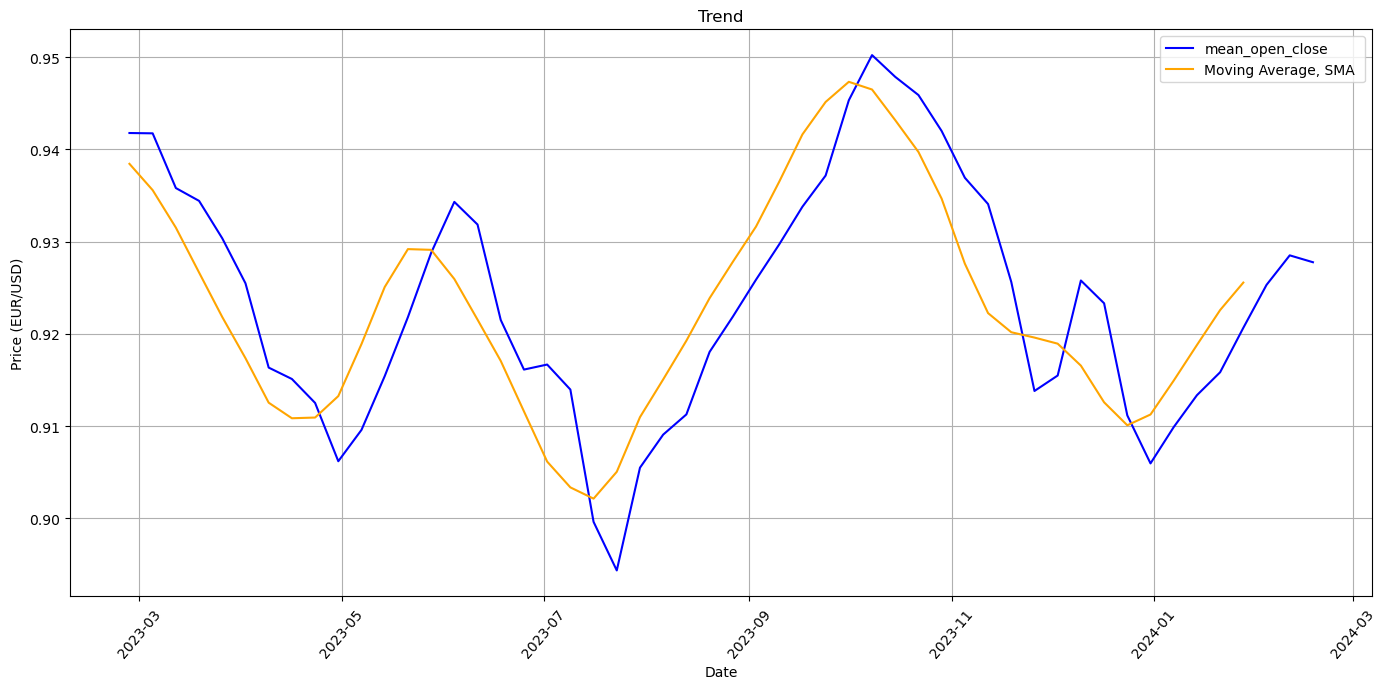

In [183]:
plt.figure(figsize=(14, 7))

plt.plot(df_EUR_F23_F24["date"], df_EUR_F23_F24["mean_open_close"], label="mean_open_close", color="blue")

plt.plot(df_copy_EUR_F23_F24["date"], df_copy_EUR_F23_F24["7_day_ma"], label="Moving Average, SMA ", color="orange")
plt.legend()
plt.title("Trend")
plt.xticks(rotation=50)   
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price (EUR/USD)")
plt.tight_layout()   
plt.show()


# s

In [ ]:
#EUR
#RUB
#CNY
#UAH